In [173]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 30
%matplotlib inline  

In [174]:
import cv2

In [175]:
from infer_demo import Homographier,KeyPointModel

In [176]:
ckpt=r'/home/chiebotgpuhq/MyCode/python/pytorch/KP2D/data/models/kp2d/v4.ckpt'

In [192]:
image_list=[
    r'/home/chiebotgpuhq/MyCode/python/pytorch/KP2D/data/datasets/kp2d/HPatches/i_leuven/1.ppm',
    r'/home/chiebotgpuhq/MyCode/python/pytorch/KP2D/data/datasets/kp2d/HPatches/i_leuven/6.ppm'
]

In [193]:
def plt_show(img_path):
    img=mpimg.imread(img_path)
    plt.imshow(img)

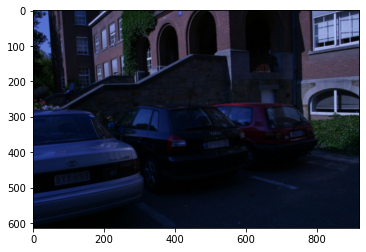

In [194]:
plt_show(image_list[0])

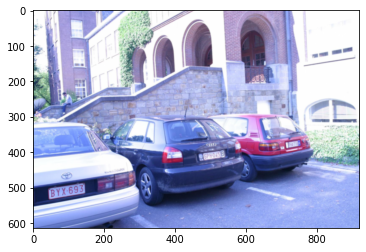

In [195]:
plt_show(image_list[1])

In [196]:
matcher=Homographier()

In [197]:
def get_kp(im1_path,im2_path,features_type='orb'):
    im1=cv2.imread(im1_path,cv2.IMREAD_COLOR)
    im2=cv2.imread(im2_path,cv2.IMREAD_COLOR)

    # Convert images to grayscale
    im1Gray = cv2.cvtColor(im1, cv2.COLOR_BGR2GRAY)
    im2Gray = cv2.cvtColor(im2, cv2.COLOR_BGR2GRAY)

    if 'orb'==features_type:
    # Detect ORB features and compute descriptors.
        detector = cv2.ORB_create(1000)
    elif 'sift'==features_type:
        detector = cv2.SIFT_create(1000)
    else:
        raise ValueError()
    keypoints1, descriptors1 = detector.detectAndCompute(im1Gray, None)
    kp1_array= np.array([list(kp.pt) for kp in keypoints1])
    keypoints2, descriptors2 = detector.detectAndCompute(im2Gray, None)
    kp2_array= np.array([list(kp.pt) for kp in keypoints2])
    return kp1_array, descriptors1,kp2_array,descriptors2

## 使用ORB特征

In [198]:
kp1_o,d1_o,kp2_o,d2_o=get_kp(*image_list,features_type='orb')

In [199]:
H=matcher(kp1_o,d1_o,kp2_o,d2_o)

In [200]:
print(H)

[[-2.57619802e+00  3.88514361e-01  4.50695845e+02]
 [-2.11875709e+00  3.22458343e-01  3.70518754e+02]
 [-5.70997863e-03  8.60693588e-04  1.00000000e+00]]


## 使用SIFT

In [201]:
kp1_o,d1_o,kp2_o,d2_o=get_kp(*image_list,features_type='sift')

In [202]:
H=matcher(kp1_o,d1_o,kp2_o,d2_o)

In [203]:
print(H)

[[ 9.80296323e-01 -4.89499224e-03  3.72243624e+01]
 [-1.60415018e-02  9.94199301e-01 -7.53200999e+00]
 [-3.96029868e-05  8.15539887e-06  1.00000000e+00]]


##  使用kpnet

In [204]:
model=KeyPointModel(ckpt)

Loaded KeypointNet from /home/chiebotgpuhq/MyCode/python/pytorch/KP2D/data/models/kp2d/v4.ckpt
KeypointNet params descriptor_loss: True
do_cross: True
do_upsample: True
use_color: True
with_io: True


In [205]:
kp_result=model(*image_list)
H=matcher(*kp_result)

In [206]:
print(H)

[[ 9.94691827e-01 -1.72658730e-02 -4.83389992e+00]
 [-4.73794624e-03  9.77917997e-01  2.93848087e+01]
 [ 1.53929404e-05 -5.86543362e-05  1.00000000e+00]]
